# Finding Corners

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [10]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = "../../res/img/course_img/chess.JPG"
IMG_PATH   

'../../res/img/course_img/chess.JPG'

---
### Loading data

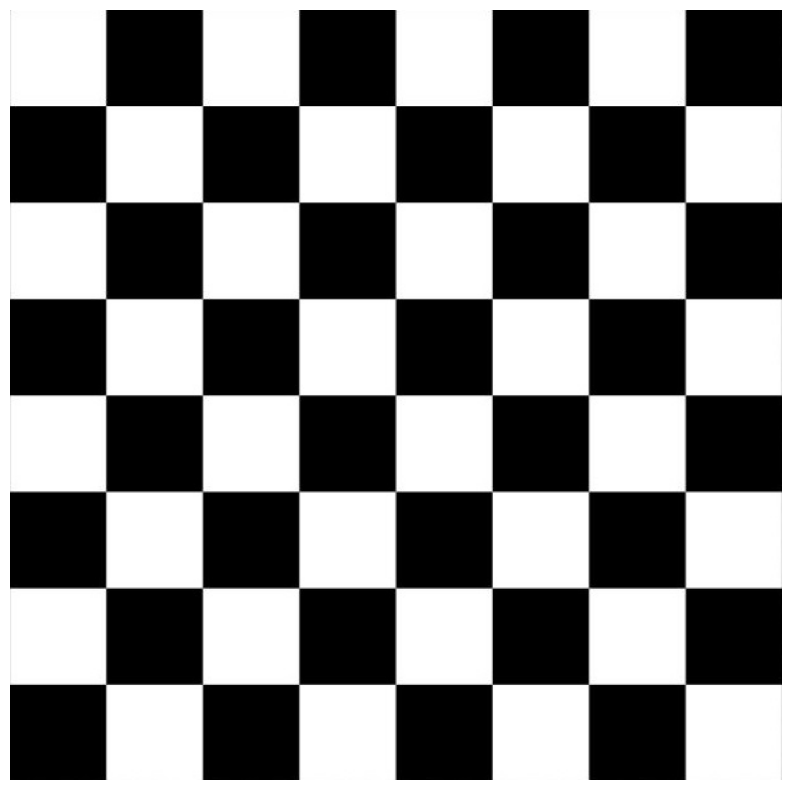

In [11]:
img = cv2.imread(IMG_PATH)
imshow(img)

---
### Finding Corners

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness. Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination.

---
### Harris Corner Detection is an algorithm developed in 1988 for corner detection that works fairly well.


**Paper** - http://www.bmva.org/bmvc/1988/avc-88-023.pdf

```python
cv2.cornerHarris(input image, block size, ksize, k)
```

- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- Output – array of corner locations (x,y)


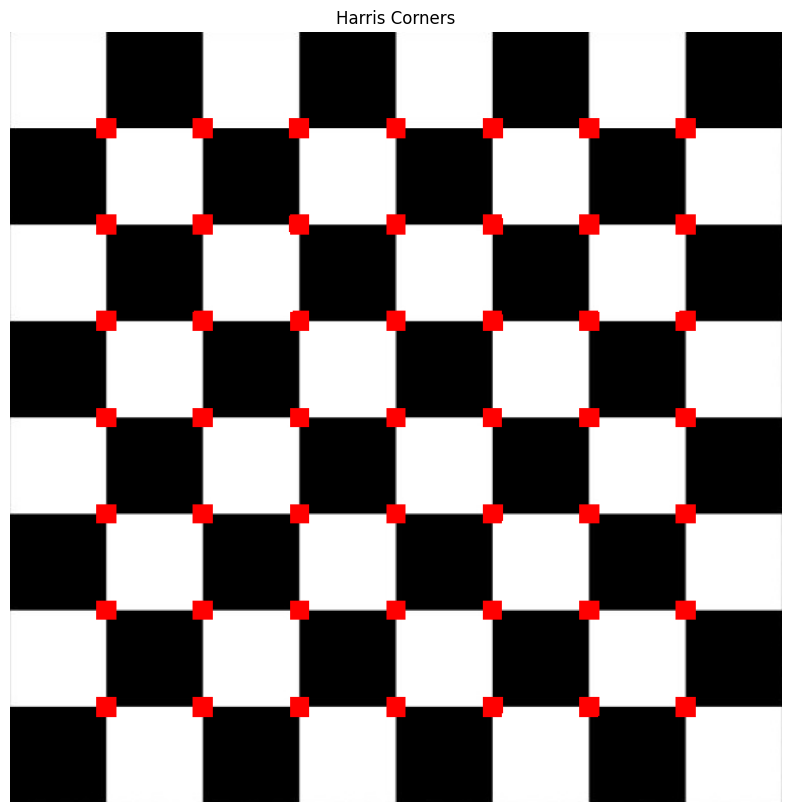

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

kernel = np.ones((7, 7), np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations=2)

copy_img = img.copy()
copy_img[harris_corners>0.25*harris_corners.max()] = [0, 0, 255]

imshow(copy_img, "Harris Corners")

---
### CV2 Function

```python
cv2.goodFeaturesToTrack(input image, maxCorners, qualityLevel, minDistance)
```

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.

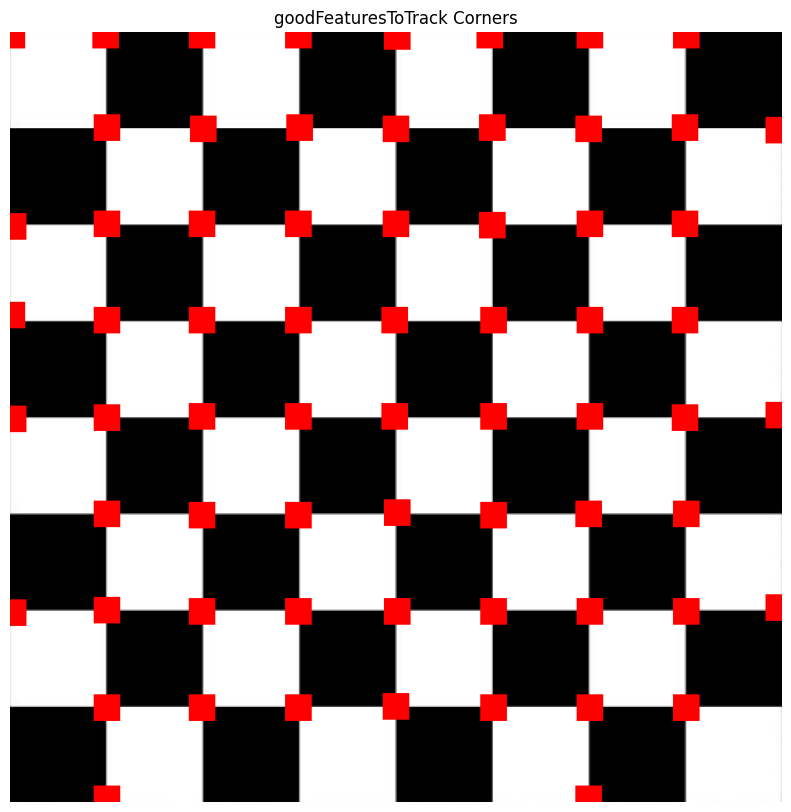

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)

copy_img = img.copy()
for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(copy_img, (x-10, y-10), (x+10, y+10), (0, 0, 255), -1)

imshow(copy_img, "goodFeaturesToTrack Corners")

---